In [ ]:
import os
os.getcwd()  # Get Working Directory

In [2]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.


Wall time: 4.16 s


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

In [29]:

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 413
nb_validation_samples = 100
epochs = 20
batch_size = 40

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [8]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
training = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
x,y = training.next()

Found 826 images belonging to 2 classes.


In [10]:
y

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0.], dtype=float32)

In [11]:
validation = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

x,y = validation.next()

Found 200 images belonging to 2 classes.


In [12]:
y

array([0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1.], dtype=float32)

In [34]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [36]:
history = model.fit_generator(
    training,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
10/10 [==============================] - 18s 2s/step - loss: 0.7061 - accuracy: 0.4086 - val_loss: 0.6935 - val_accuracy: 0.4750
Epoch 2/20
10/10 [==============================] - 18s 2s/step - loss: 0.6938 - accuracy: 0.4950 - val_loss: 0.6881 - val_accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 18s 2s/step - loss: 0.6971 - accuracy: 0.4500 - val_loss: 0.6876 - val_accuracy: 0.5750
Epoch 4/20
10/10 [==============================] - 18s 2s/step - loss: 0.6928 - accuracy: 0.5150 - val_loss: 0.6857 - val_accuracy: 0.5750
Epoch 5/20
10/10 [==============================] - 18s 2s/step - loss: 0.6906 - accuracy: 0.5750 - val_loss: 0.6954 - val_accuracy: 0.6000
Epoch 6/20
10/10 [==============================] - 18s 2s/step - loss: 0.6898 - accuracy: 0.5450 - val_loss: 0.6879 - val_accuracy: 0.4250
Epoch 7/20
10/10 [==============================] - 17s 2s/step - loss: 0.6859 - accuracy: 0.5591 - val_loss: 0.7146 - val_accuracy: 0.3250
Epoch 8/20
10/10 [==

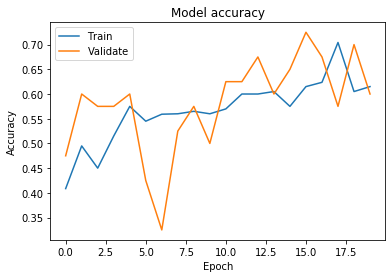

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(validation)

In [ ]:
predictions

In [ ]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [ ]:
newpredictions =  np.rint(predictions)

In [ ]:
newpredictions